# Image Recognition with Tensorflow 2

In the first session, we learned how to make a basic image recognition model in tensorflow, but our model performed rather poorly. 

Today, we'll be going over various ways to improve our model.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We'll need to get our dataset again -> images of daisies, dandelions, roses, sunflowers, tulips.

In [9]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

We can then reload our model into Keras. 

In [10]:
# set batch size and image size
batch_size = 32
img_height = 180
img_width = 180

# load data set
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# validation split
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

# configure for performance
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


Our first model was built by constructing various layers that feed into one another. The layers so far included:

- rescaling our values to be between 0 and 1, rather than 0 and 255.
- flattening our data to be in a single dimension, rather than 3.
- a fully connected Dense layer that uses all pixel information
- another fully connected layer that makes class predictions

We then compile our model and pick an optimizer, a loss function, and a measure for us to evaluate.

In [11]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 flatten_1 (Flatten)         (None, 97200)             0         
                                                                 
 dense_2 (Dense)             (None, 32)                3110432   
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 3,110,597
Trainable params: 3,110,597
Non-trainable params: 0
_________________________________________________________________


We then run our model for 10 epochs.

In [12]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2023-07-12 14:44:45.848027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2936]
	 [[{{node Placeholder/_4}}]]
2023-07-12 14:44:45.849319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2936]
	 [[{{node Placeholder/_4}}]]


92/92 [==============================] - ETA: 0s - loss: 2.7531 - accuracy: 0.1952

2023-07-12 14:44:55.606747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [734]
	 [[{{node Placeholder/_0}}]]
2023-07-12 14:44:55.609564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [734]
	 [[{{node Placeholder/_0}}]]


92/92 [==============================] - 11s 92ms/step - loss: 2.7531 - accuracy: 0.1952 - val_loss: 1.5996 - val_accuracy: 0.2439
Epoch 2/10
92/92 [==============================] - 7s 72ms/step - loss: 1.6110 - accuracy: 0.2466 - val_loss: 1.6066 - val_accuracy: 0.2398
Epoch 3/10
92/92 [==============================] - 7s 82ms/step - loss: 1.6054 - accuracy: 0.2459 - val_loss: 1.6048 - val_accuracy: 0.2398
Epoch 4/10
92/92 [==============================] - 7s 82ms/step - loss: 1.6036 - accuracy: 0.2459 - val_loss: 1.6036 - val_accuracy: 0.2398
Epoch 5/10
92/92 [==============================] - 8s 88ms/step - loss: 1.6024 - accuracy: 0.2459 - val_loss: 1.6028 - val_accuracy: 0.2398
Epoch 6/10
92/92 [==============================] - 8s 91ms/step - loss: 1.6015 - accuracy: 0.2459 - val_loss: 1.6022 - val_accuracy: 0.2398
Epoch 7/10
92/92 [==============================] - 7s 80ms/step - loss: 1.6009 - accuracy: 0.2459 - val_loss: 1.6021 - val_accuracy: 0.2398
Epoch 8/10
92/92 [=====

We then plotted the model, showing loss and accuracy over time as the model trained for the training and validation data. 

<details>

<summary>More info</summary>

We have taken the code we used last time for building a figure into a [custom function](https://deisdata.github.io/python/functions/) called `plot_results()`. This allows us to reuse this code several times, without needed to type it all again.

</details>

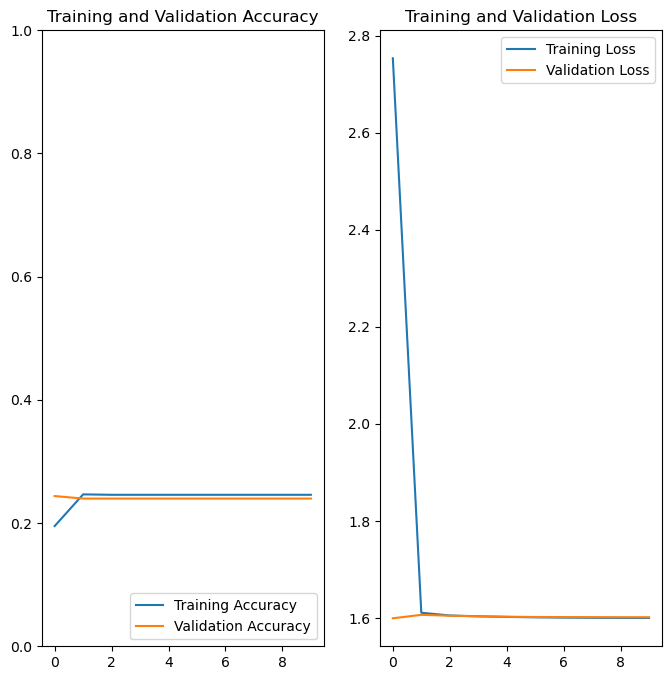

In [13]:
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()
    
plot_results(history)

By the end of the session, we will produce a model that has an accuracy of approximately 75% that looks like this:

![good training plot](../data/good_training.png)


## Model complexity

Our original model had 32 nodes in the primary Dense layer. We can increase the number of nodes to try to capture more complicated relationships in our image data.

In this new model, we have 128 nodes in the first Dense layer. 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 flatten_2 (Flatten)         (None, 97200)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               12441728  
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 12,442,373
Trainable params: 12,442,373
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
92/92 [==============================] - 14s 146ms/step - loss: 7.5241 - accuracy: 0.3038 - val_loss: 1.7235 - val_accuracy: 0.3597
Epoch 2/10
92/92 [=============

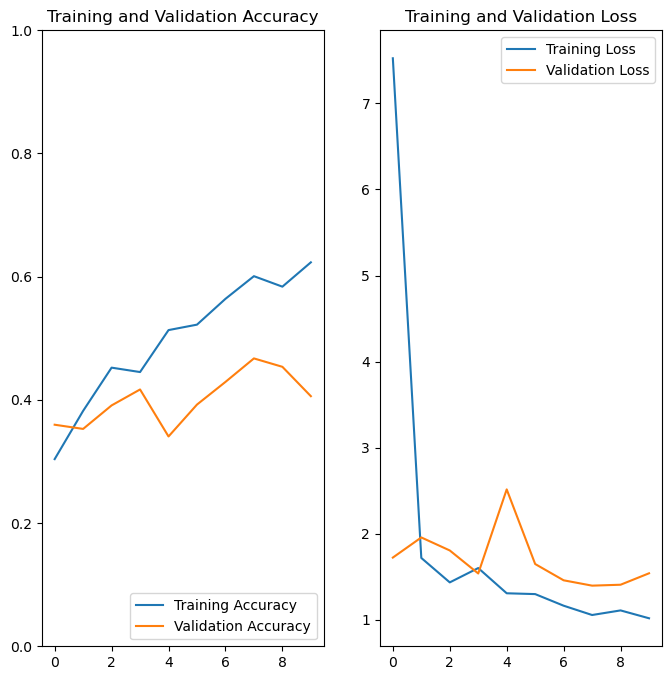

In [14]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

plot_results(history)

## Convolutional layer

Having more nodes helps, but our model performance is still poor. Dense layers ignore the dimensional and structural parts of a image -> which are the values of the pixels nearby?

To consider this dimensional aspect of image data, we need to add an additional layer called a **convolutional layer**. Convolutional layers look for patterns of pixels across small portions of our image, such as vertical or horizontal lines. These filters are passed over the image in an overlapping fashion to pick out where they occur.

<img src="https://docs-assets.developer.apple.com/published/09348c5368/a55b1477-4f79-4221-8aa1-ab3ae9f01f89.png" alt="convolutional layer" width=600px>

<br>
<br>


<img src="https://www.l3harrisgeospatial.com/docs/html/images/emboss.png" alt="embossing example" width=600px>


<details>

<summary>More info</summary>

We use [`layers.Rescaling()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Rescaling) to create a convolutional layer. 

We'll start by applying 16 filters to our 3 RGB channels. `padding=same` just makes sure the output for each filter is the same size as each image. We'll use the same activation function as for the Dense layer, as well. 

After the convolutional layer, we'll add a **max pooling layer** with [`layers.MaxPooling2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D). Max pooling layers will summarize parts of the image for each filter, saying how strongly the filter appeared in each region of the image. 

![max pooling](https://production-media.paperswithcode.com/methods/MaxpoolSample2.png)

We'll also keep our Dense layer, and feed the output of the convolutional layer to it. 

</details>

In [15]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 flatten_3 (Flatten)         (None, 129600)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               16588928  
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                      

In [16]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 23s 248ms/step - loss: 2.2693 - accuracy: 0.4077 - val_loss: 1.1336 - val_accuracy: 0.5409
Epoch 2/10
92/92 [==============================] - 22s 241ms/step - loss: 0.9376 - accuracy: 0.6352 - val_loss: 1.1416 - val_accuracy: 0.5286
Epoch 3/10
92/92 [==============================] - 22s 239ms/step - loss: 0.6816 - accuracy: 0.7694 - val_loss: 1.0825 - val_accuracy: 0.5736
Epoch 4/10
92/92 [==============================] - 23s 247ms/step - loss: 0.4227 - accuracy: 0.8815 - val_loss: 1.0544 - val_accuracy: 0.5926
Epoch 5/10
92/92 [==============================] - 24s 258ms/step - loss: 0.2387 - accuracy: 0.9496 - val_loss: 1.1503 - val_accuracy: 0.5913
Epoch 6/10
92/92 [==============================] - 23s 250ms/step - loss: 0.1448 - accuracy: 0.9751 - val_loss: 1.1923 - val_accuracy: 0.5886
Epoch 7/10
92/92 [==============================] - 24s 264ms/step - loss: 0.0867 - accuracy: 0.9901 - val_loss: 1.3246 - val_accuracy: 0.5586

This model still performs less than optimally, but more consistently overall. 

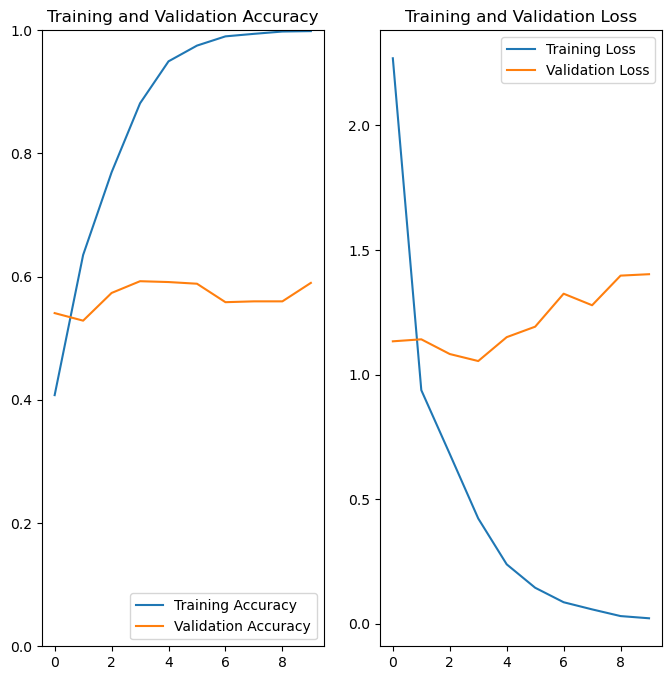

In [17]:
plot_results(history)

## Adding more layers

A single convolutional layer can pick simple parts of images, like lines or curves. However, if we feed the output from one convolutional layer to a new convolutional layer, the model can start to identify pieces of the image together. Lines can combine to be the ovals, which can combine to be the petals of a flower by the time we reach a third layer. By looking at combinations of simple parts of an image, the model becomes capable of identifying complex components. 

We do want to add a max pooling layer after every convolutional layer to help summarize as our model grows increasingly complex.

<img src='https://editor.analyticsvidhya.com/uploads/94787Convolutional-Neural-Network.jpeg' width=600px;>


In [20]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 64)       

Fit same model as last time. 

In [19]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 31s 333ms/step - loss: 1.3661 - accuracy: 0.4544 - val_loss: 1.0383 - val_accuracy: 0.5722
Epoch 2/10
92/92 [==============================] - 35s 379ms/step - loss: 0.9859 - accuracy: 0.6148 - val_loss: 0.9836 - val_accuracy: 0.6253
Epoch 3/10
92/92 [==============================] - 31s 332ms/step - loss: 0.8168 - accuracy: 0.6826 - val_loss: 0.9336 - val_accuracy: 0.6512
Epoch 4/10
92/92 [==============================] - 32s 345ms/step - loss: 0.6347 - accuracy: 0.7582 - val_loss: 0.9632 - val_accuracy: 0.6485
Epoch 5/10
92/92 [==============================] - 34s 368ms/step - loss: 0.4451 - accuracy: 0.8362 - val_loss: 1.0757 - val_accuracy: 0.6322
Epoch 6/10
92/92 [==============================] - 30s 331ms/step - loss: 0.3166 - accuracy: 0.8931 - val_loss: 1.1708 - val_accuracy: 0.6362
Epoch 7/10
92/92 [==============================] - 30s 329ms/step - loss: 0.1727 - accuracy: 0.9414 - val_loss: 1.4464 - val_accuracy: 0.6076

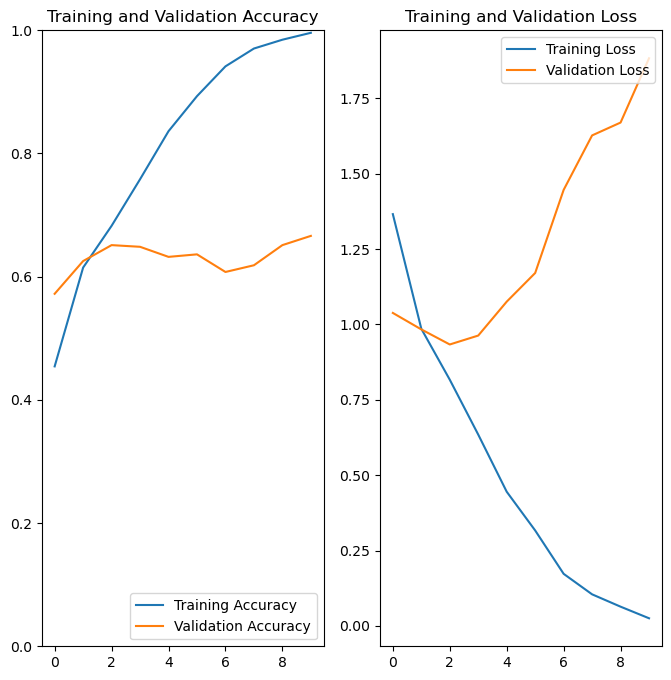

In [21]:
plot_results(history)

Our model is starting to perform a lot better, with our validation accuracy above 60%. We can see that training accuracy is actually nearly perfect however, and our validation loss is actually becoming worse over time.

This pattern is consistent with **overfitting**. This occurs when the model becomes excellent at predicting the training data, but the predictions don't generalize as well to new data. 

You can think of overfitting as memorizing an answer sheet. When the model gets presented new information that is not on the answer sheet, it does poorly. 

Looking at our data, how might our model be memorizing the answer sheet?

<img src="../data/some_flowers.png" alt="Some images" width=600px>

## Dropout layer
Overfitting can be caused by having a model that is too complicated. New data are not likely to contain every single feature or shape in our training data, so making our model contain too many of these can lead to overfitting. 

To alleviate this problem, we can use a **dropout layer**. This randomly removes a proportion of the inputs to the next layer, removing some complexity from the model.

<img src='https://www.baeldung.com/wp-content/uploads/sites/4/2020/05/2-1-2048x745-1.jpg' width='50%'>

<details>

<summary>More info</summary>

We can use [`layers.Dropout()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) to create a dropout layer. The proportion specified inside the function will determine the proportion of inputs randomly removed or deactivated from the previous layer.

This forces the model to not rely too heavily on specific values. This should eliminate some overfitting that is going on. 

</details>

In [22]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 45, 45, 64)       

In [23]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 35s 369ms/step - loss: 1.2947 - accuracy: 0.4377 - val_loss: 1.1064 - val_accuracy: 0.5654
Epoch 2/10
92/92 [==============================] - 28s 306ms/step - loss: 0.9720 - accuracy: 0.6277 - val_loss: 1.0085 - val_accuracy: 0.5913
Epoch 3/10
92/92 [==============================] - 28s 307ms/step - loss: 0.7915 - accuracy: 0.6989 - val_loss: 0.8812 - val_accuracy: 0.6567
Epoch 4/10
92/92 [==============================] - 34s 374ms/step - loss: 0.5771 - accuracy: 0.7916 - val_loss: 0.8650 - val_accuracy: 0.6771
Epoch 5/10
92/92 [==============================] - 34s 363ms/step - loss: 0.3629 - accuracy: 0.8747 - val_loss: 1.0409 - val_accuracy: 0.6499
Epoch 6/10
92/92 [==============================] - 37s 406ms/step - loss: 0.2467 - accuracy: 0.9176 - val_loss: 1.2296 - val_accuracy: 0.6376
Epoch 7/10
92/92 [==============================] - 41s 441ms/step - loss: 0.1355 - accuracy: 0.9564 - val_loss: 1.3323 - val_accuracy: 0.6594

We can see that our model performance didn't really improve over the last rendition. Model performance is still plateauing, meaning reducing model complexity was not incredibly successful.

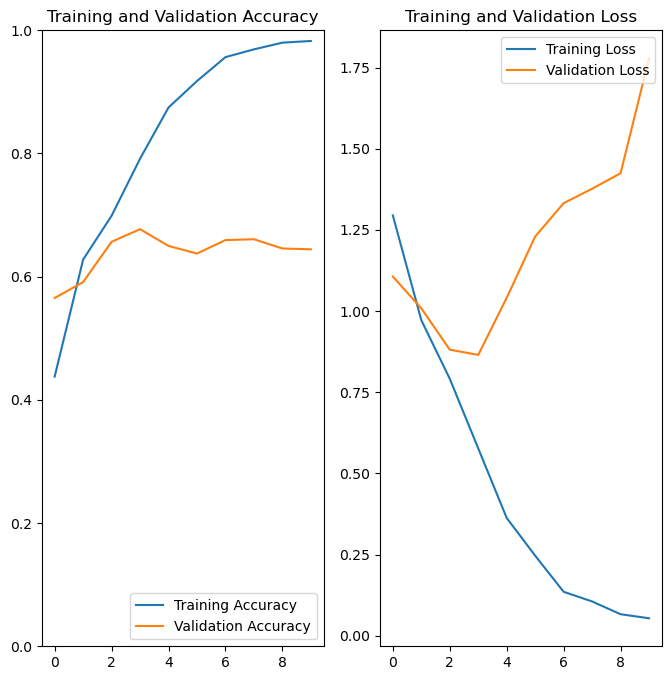

In [24]:
plot_results(history)

## Data augmentation

Our data set is somewhat limited in size, only containing several thousand images. We could try to increase the sample size by grabbing more images of flowers from the internet, which can be time consuming.

Another potential solution is **data augmentation**. Data augmentation is taking the data we already have and applying random transformations to data to generate more training data. For us, this means taking images we already have, and randomly flipping rotating, and zooming them. We then add these modified images to the data set. 

Note: the current version of tensorflow prints out a lot of warnings when you do data augmentation. This is a bug which you can safely ignore. 

In [25]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

When we visualize, the data, we can see that we have new versions of old images with slight zooms, flips, and rotations. 

2023-07-12 15:08:16.697120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2936]
	 [[{{node Placeholder/_0}}]]
2023-07-12 15:08:16.697593: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2936]
	 [[{{node Placeholder/_4}}]]


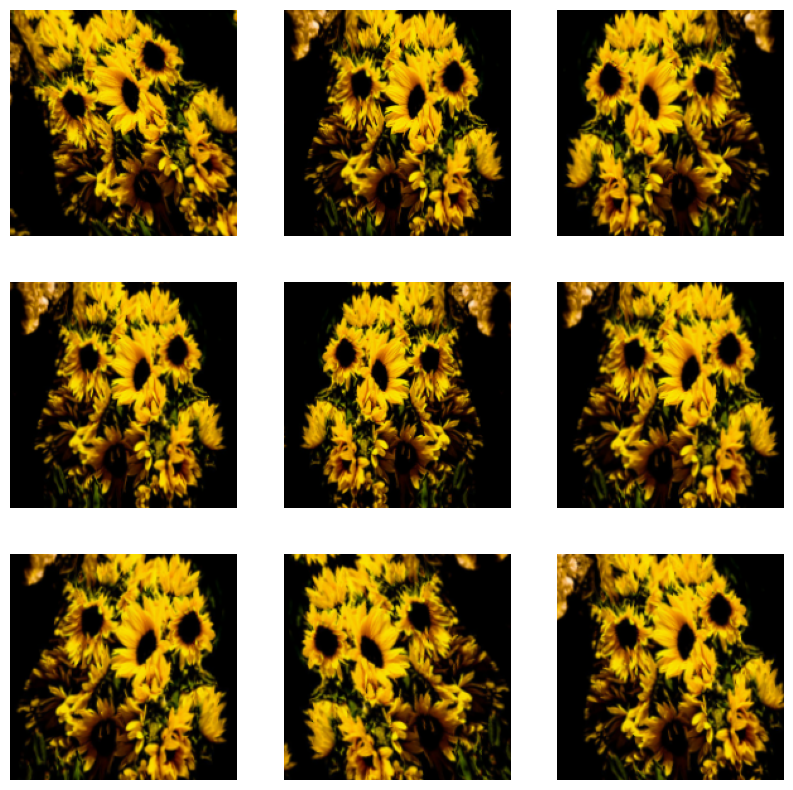

In [26]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[1].numpy().astype("uint8"))
    plt.axis("off")

We can insert the data augmentation into the model as a first layer.

In [27]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

We increase the number of epochs here to make sure we minimize validation loss.

In [28]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 41s 428ms/step - loss: 1.2081 - accuracy: 0.4877 - val_loss: 1.1076 - val_accuracy: 0.5409
Epoch 2/20
92/92 [==============================] - 38s 418ms/step - loss: 1.0066 - accuracy: 0.6076 - val_loss: 0.9422 - val_accuracy: 0.6376
Epoch 3/20
92/92 [==============================] - 37s 403ms/step - loss: 0.8936 - accuracy: 0.6557 - val_loss: 0.9431 - val_accuracy: 0.6308
Epoch 4/20
92/92 [==============================] - 38s 418ms/step - loss: 0.8185 - accuracy: 0.6836 - val_loss: 0.8330 - val_accuracy: 0.6635
Epoch 5/20
92/92 [==============================] - 38s 417ms/step - loss: 0.7811 - accuracy: 0.7010 - val_loss: 0.8102 - val_accuracy: 0.6798
Epoch 6/20
92/92 [==============================] - 42s 454ms/step - loss: 0.7439 - accuracy: 0.7221 - val_loss: 0.8108 - val_accuracy: 0.7003
Epoch 7/20
92/92 [==============================] - 40s 436ms/step - loss: 0.6975 - accuracy: 0.7381 - val_loss: 0.8033 - val_accuracy: 0.6866

We are now approaching validation accuracy over 70%, much better than where we started. However, there is still room to improve. Feel free to keep trying to make modifications to make the model better.

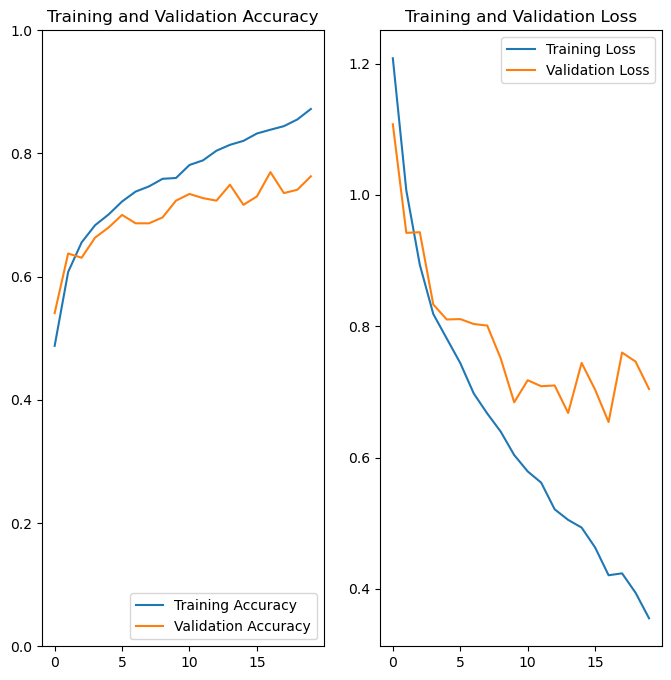

In [29]:
plot_results(history)

## Using our model to make predictions

We can try to predict flower type of an image not in the training or validation set. We have a function below that imports images of flowers from the internet (when provided a URL) and uses the model we've made to predict the flower type. 

<br>

<details>

<summary>More info</summary>

We define a custom function here. Please look at [this guide about custom function](https://deisdata.github.io/python/functions/). 

We use [`tf.keras.utils.get_file()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file) to download an image file from the internet that we specify when we run the function. If the file is already downloaded, it does not get re-downloaded. 

[`tf.keras.utils.load_img()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img) loads the image into a PIL format. 

```python
flower_path = tf.keras.utils.get_file(origin=flower_url)

img = tf.keras.utils.load_img(
    flower_path, target_size=(img_height, img_width)
)
```

Now, we use [`tf.keras.utils.img_to_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array) to convert our image data into an array.
[`tf.expand_dims()`](https://www.tensorflow.org/api_docs/python/tf/expand_dims) adds another dimension to the array to compensate for the fact that we need input data to be in a batch. This function here essentially puts the image into a batch of 1 so that it is usable by our pipeline

```python
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
```

We can feed our new image into `model.predict()` to give scores for each of the five flowers. The class with the highest score is the prediction for that image.

[`tf.nn.softmax()`](https://www.tensorflow.org/api_docs/python/tf/nn/softmax) converts the scores from `model.predict()` so that the total of all of the scores adds up to 1.0. You can read more about the softmax function [here](https://deepai.org/machine-learning-glossary-and-terms/softmax-layer). 

```python
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
```

We use [`.format()`](https://www.w3schools.com/python/ref_string_format.asp) to insert values into our printed string. 

We can [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) to get the index of the highest value in `score`. We treat the highest relative score as the confidence in our prediction.

```python
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
```

</details>

In [30]:
def predict_flower(flower_url):
    
    flower_path = tf.keras.utils.get_file(origin=flower_url)

    img = tf.keras.utils.load_img(
        flower_path, target_size=(img_height, img_width)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
    
    return None

Our model makes some successful predictions with high confidence, but it also makes some incorrect predictions with reasonably high confidence as well.

In [34]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
tulip_url = "https://helloartsy.com/wp-content/uploads/kids/flowers/how_to_draw_a_tulip/how-to-draw-a-tulip_step-6.jpg"
dandelion_url1 = "https://www.southernliving.com/thmb/lJ33cHiLHjUloZlfDX1UppUJ_DA=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-1176988236-2000-c8f09103b3f5459ebd1528b7ea264c4e.jpg
dandelion_url2 = "https://www.minnesotawildflowers.info/udata/r9ndp23q/pd/taraxacum-officinale-3.jpg"
rose_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Natural_Rose_1.jpg/3024px-Natural_Rose_1.jpg"
daisy_url = "https://upload.wikimedia.org/wikipedia/commons/5/53/Belis_peremnis_-_panoramio.jpg"

print('SUNFLOWER')
predict_flower(sunflower_url)
print('TULIP')
predict_flower(tulip_url)
print('DANDELION (yellow)')
predict_flower(dandelion_url1)
print('DANDELION (white)')
predict_flower(dandelion_url2)
print('ROSE')
predict_flower(rose_url)
print('DAISY')
predict_flower(daisy_url)

SUNFLOWER
1/1 [==============================] - 0s 62ms/step
This image most likely belongs to sunflowers with a 99.18 percent confidence.
TULIP
1/1 [==============================] - 0s 143ms/step
This image most likely belongs to tulips with a 88.10 percent confidence.
DANDELION (yellow)
1/1 [==============================] - 0s 61ms/step
This image most likely belongs to sunflowers with a 72.07 percent confidence.
DANDELION (white)
1/1 [==============================] - 0s 148ms/step
This image most likely belongs to dandelion with a 98.70 percent confidence.
ROSE
1/1 [==============================] - 0s 29ms/step
This image most likely belongs to roses with a 76.97 percent confidence.
DAISY
1/1 [==============================] - 0s 58ms/step
This image most likely belongs to daisy with a 100.00 percent confidence.
